**Breast Cancer Classification with a simple Neural Network (NN)**

### Importing Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### Data Collection & Processing

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

In [5]:
# loading the data to a data frame
data = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.15640,0.06019,0.2350,0.07014
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.019210,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.11840,0.1963,0.19370,0.08442,0.2983,0.07185
346,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,13.64,27.06,86.54,562.6,0.12890,0.1352,0.04506,0.05093,0.2880,0.08083
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.150400,0.2569,0.06670,...,25.30,31.86,171.10,1938.0,0.15920,0.4492,0.53440,0.26850,0.5558,0.10240


In [13]:
data['target'] = breast_cancer_dataset.target

In [16]:
data.drop(columns="label")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
# number of rows and columns in the dataset
data.shape

(569, 32)

In [19]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
# Checking missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
target                     0
dtype: int64

In [23]:
# Statistical measures about data
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000,1.000000


In [25]:
# Checking distributions of the target
data['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

0 --> Malignant

1 --> Benign

In [26]:
data.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0


### Seperating features and target

In [45]:
X = data.drop(columns='target', axis=1)
y = data['target']

In [46]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [47]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


### Splitting Dataset into training and testing data

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


In [51]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (455,) (114,)


### Standardizing Data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [58]:
## Importing Tensorflow and Keras

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [59]:
## Setting up layers of Neural Network (Input, Hidden, Output)

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31,)), #convert the data into single dimensional array
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [60]:
## Compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [61]:
## Training the Neural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 0.5821 - accuracy: 0.7433 - val_loss: 0.5298 - val_accuracy: 0.6957
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 0.8778 - val_loss: 0.3826 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2808 - accuracy: 0.9438 - val_loss: 0.2932 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.9707 - val_loss: 0.2349 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1714 - accuracy: 0.9804 - val_loss: 0.1945 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1424 - accuracy: 0.9829 - val_loss: 0.1662 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1216 - accuracy: 0.9878 - val_loss: 0.1449 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

### Visualizing Accuracy and Loss


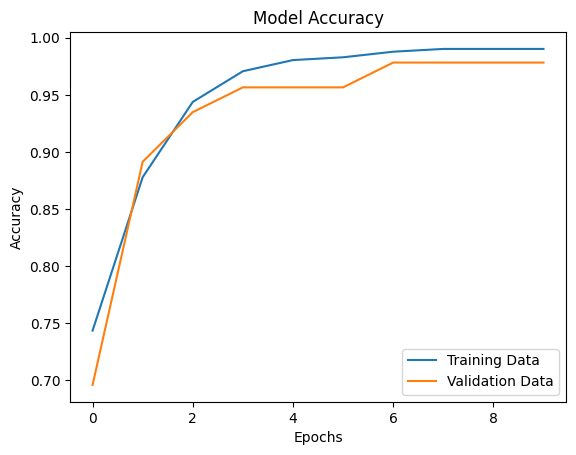

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Training Data','Validation Data'], loc='lower right')
plt.show()

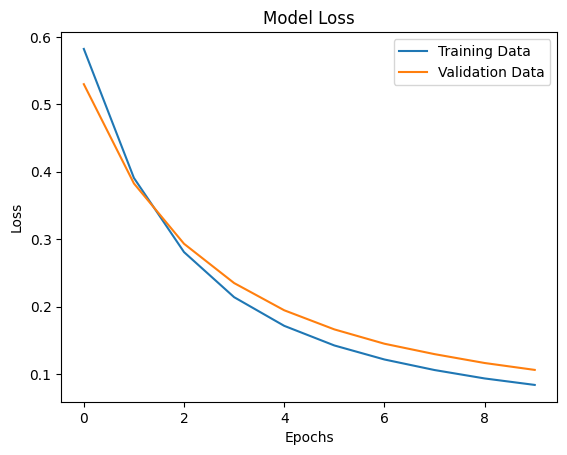

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'Validation Data'], loc = 'upper right')
plt.show()

### Accuracy of the Model on Test Data

In [66]:
loss,accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9825
0.9824561476707458


In [67]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.20175604  0.3290786  -0.13086754 -0.27145506  1.02919769  0.86411836
  0.73363898  0.85669688  1.12032775  1.5535848  -0.04197566 -0.51588206
  0.13154087 -0.13875636 -0.55953973 -0.13797354  0.0980708   0.28751196
 -0.42446141  0.11305149  0.03150414  0.67628886  0.18528621 -0.06280808
  1.10353068  0.87444267  1.2190909   1.3893291   1.08203284  1.54029664
 -1.32573593]


In [68]:
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 5ms/step


In [69]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.7082193  0.11156897]


In [70]:
print(X_test_std)

[[-0.20175604  0.3290786  -0.13086754 ...  1.08203284  1.54029664
  -1.32573593]
 [-0.25555773  1.46763319 -0.31780437 ... -0.73131577 -0.87732522
   0.75429803]
 [-0.02619262 -0.8407682  -0.09175081 ... -1.22080864 -0.92115937
   0.75429803]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  0.20317063 -0.15406178
  -1.32573593]
 [ 1.18859296  0.34352115  1.19333694 ...  0.26991966 -0.27320074
  -1.32573593]
 [ 0.26263752 -0.58080224  0.28459338 ... -1.15564888  0.11231497
   0.75429803]]


In [72]:
print(y_pred)

[[7.08219290e-01 1.11568965e-01]
 [2.27199763e-01 8.40920091e-01]
 [1.41103566e-01 8.67204368e-01]
 [1.69162825e-01 8.53107810e-01]
 [7.43370354e-02 9.21995699e-01]
 [1.08993590e-01 8.24338317e-01]
 [1.37159228e-01 6.30170524e-01]
 [8.74136388e-02 8.96993279e-01]
 [7.00072125e-02 7.40836143e-01]
 [3.37729715e-02 8.35335910e-01]
 [2.03706399e-01 2.15116873e-01]
 [2.59910673e-01 7.61722445e-01]
 [6.66954219e-02 8.14309537e-01]
 [2.33392075e-01 6.87644064e-01]
 [2.46026292e-01 3.74208242e-01]
 [5.84478617e-01 1.11143202e-01]
 [2.38765832e-02 3.23973030e-01]
 [9.64267910e-01 2.12365221e-02]
 [8.80379438e-01 2.60105487e-02]
 [9.21089232e-01 7.81051582e-04]
 [2.44585395e-01 5.69101907e-02]
 [7.66879857e-01 8.70033950e-02]
 [2.82921284e-01 6.65160537e-01]
 [1.43585742e-01 8.18157434e-01]
 [9.56151664e-01 4.90208492e-02]
 [1.24307983e-01 8.77548814e-01]
 [7.54363611e-02 9.28820431e-01]
 [4.72621262e-01 3.10080294e-02]
 [1.40418991e-01 8.62571895e-01]
 [9.23245430e-01 1.70071628e-02]
 [8.848810

### model.predict(), gives the prediction probability of each class for that data point

In [73]:
## Argmax function

my_list = [0.25,0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [74]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]


###**Building Predictive System**

In [83]:
input_data = (11.76,21.6,30.96,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 22ms/step
[[0. 0.]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
